<a href="https://colab.research.google.com/github/Eu9EN3/vkr_/blob/main/vkr_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Подключаем доступ к файлам Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Определеляем пути для Google Drive 
models_path = '/content/drive/MyDrive/vkr/nb/models/'
data_path = '/content/drive/MyDrive/vkr/nb/data/'

In [3]:
# Импортируем необходимые библиотеки
import os
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import pandas_profiling 
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
import pickle
import warnings
warnings.filterwarnings("ignore")
matplotlib.style.use('seaborn-pastel')
%matplotlib inline

In [4]:
# Загружаем данные из файла X_bp
X_bp = pd.read_excel(data_path + 'X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [5]:
X_bp

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  
0.0                       3000.000000               220.000000  
1.0                       3000.000000               220.000000  
2.0                       3000.000000               220.000000  
3.0                       3000.000000               220.000000  
4.0                       3000.000000               220.000000  
...                               ...                      ...  
1018.0                    2387.292495               125.007669  
1019.0                    2360.392784               117.730099  
1020.0                    2662.906040               236.606764  
1021.0                    2071.715856               197.126067  
1022.0                    2856.328932

In [6]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [7]:
# Загружаем данные из файла X_nup
X_nup = pd.read_excel(data_path + 'X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

In [8]:
X_nup

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                    0.0     4.000000          57.000000
1.0                    0.0     4.000000          60.000000
2.0                    0.0     4.000000          70.000000
3.0                    0.0     5.000000          47.000000
4.0                    0.0     5.000000          57.000000
...                    ...          ...                ...
1035.0                90.0     8.088111          47.759177
1036.0                90.0     7.619138          66.931932
1037.0                90.0     9.800926          72.858286
1038.0                90.0    10.079859          65.519479
1039.0                90.0     9.021043          66.920143

[1040 rows x 3 columns]

In [9]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


In [10]:
X_bp.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [11]:
X_nup.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'], dtype='object')

In [12]:
# Объединяем наборы данных X_bp и X_nup
df = pd.concat([X_bp, X_nup], join = 'inner', axis = 1, ignore_index=False, sort = False)
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [13]:
df.shape

(1023, 13)

In [14]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0.0                       3000.000000               220.000000   
1.0                       3000.000000               220.000000   
2.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

In [15]:
# Сохраняем полученный массив
df.to_excel(data_path + 'data_concat.xlsx')

In [16]:
# Выводим информацию о типах данных по всем признакам
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Все признаки имеют тип чисел с плавающей точкой float64.

In [17]:
# Выводим сведения об уникальных значениях в каждом из столбцов
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [18]:
# Выводим описательную статистику
df.describe().T.style.format(precision=3)

In [19]:
# Проверяем наличие в датафрейме пропущенных значений
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропуски отсутствуют.

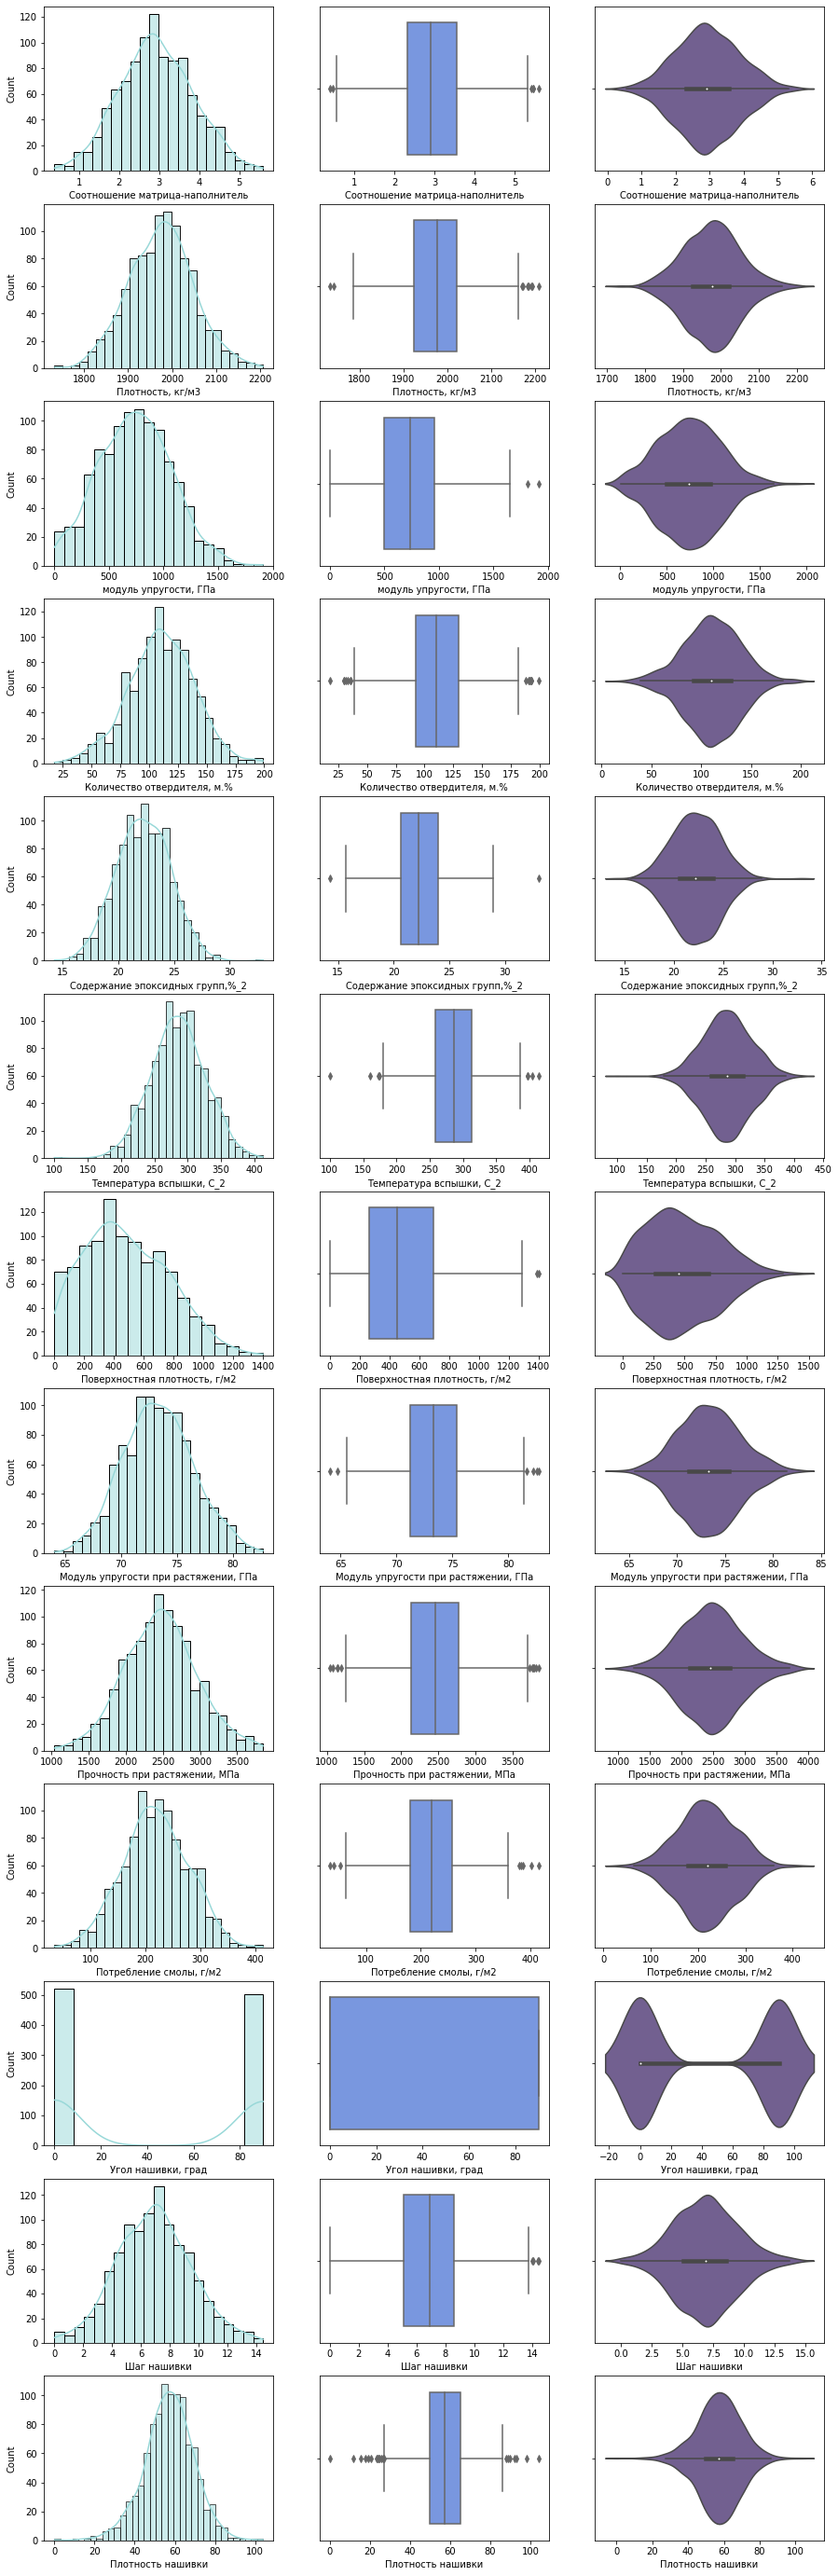

In [20]:
# Для визуализации распределения значения признаков строим соответствующие гистограммы и диаграммы
fig, axes = plt.subplots(13, 3, figsize=(15, 50))
for i, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[i, 0], color='#98D8D8')
    sns.boxplot(data=df, x=column, ax=axes[i, 1], color='#6890F0')
    sns.violinplot(data=df, x=column, ax=axes[i, 2], color='#705898')
plt.show()

Практически все гистограммы имеют колоколообразный симметричный вид. Можно говорить о том, что анализируемые признаки, кроме признака "Угол нашивки, град", имеют нормальное распределение.


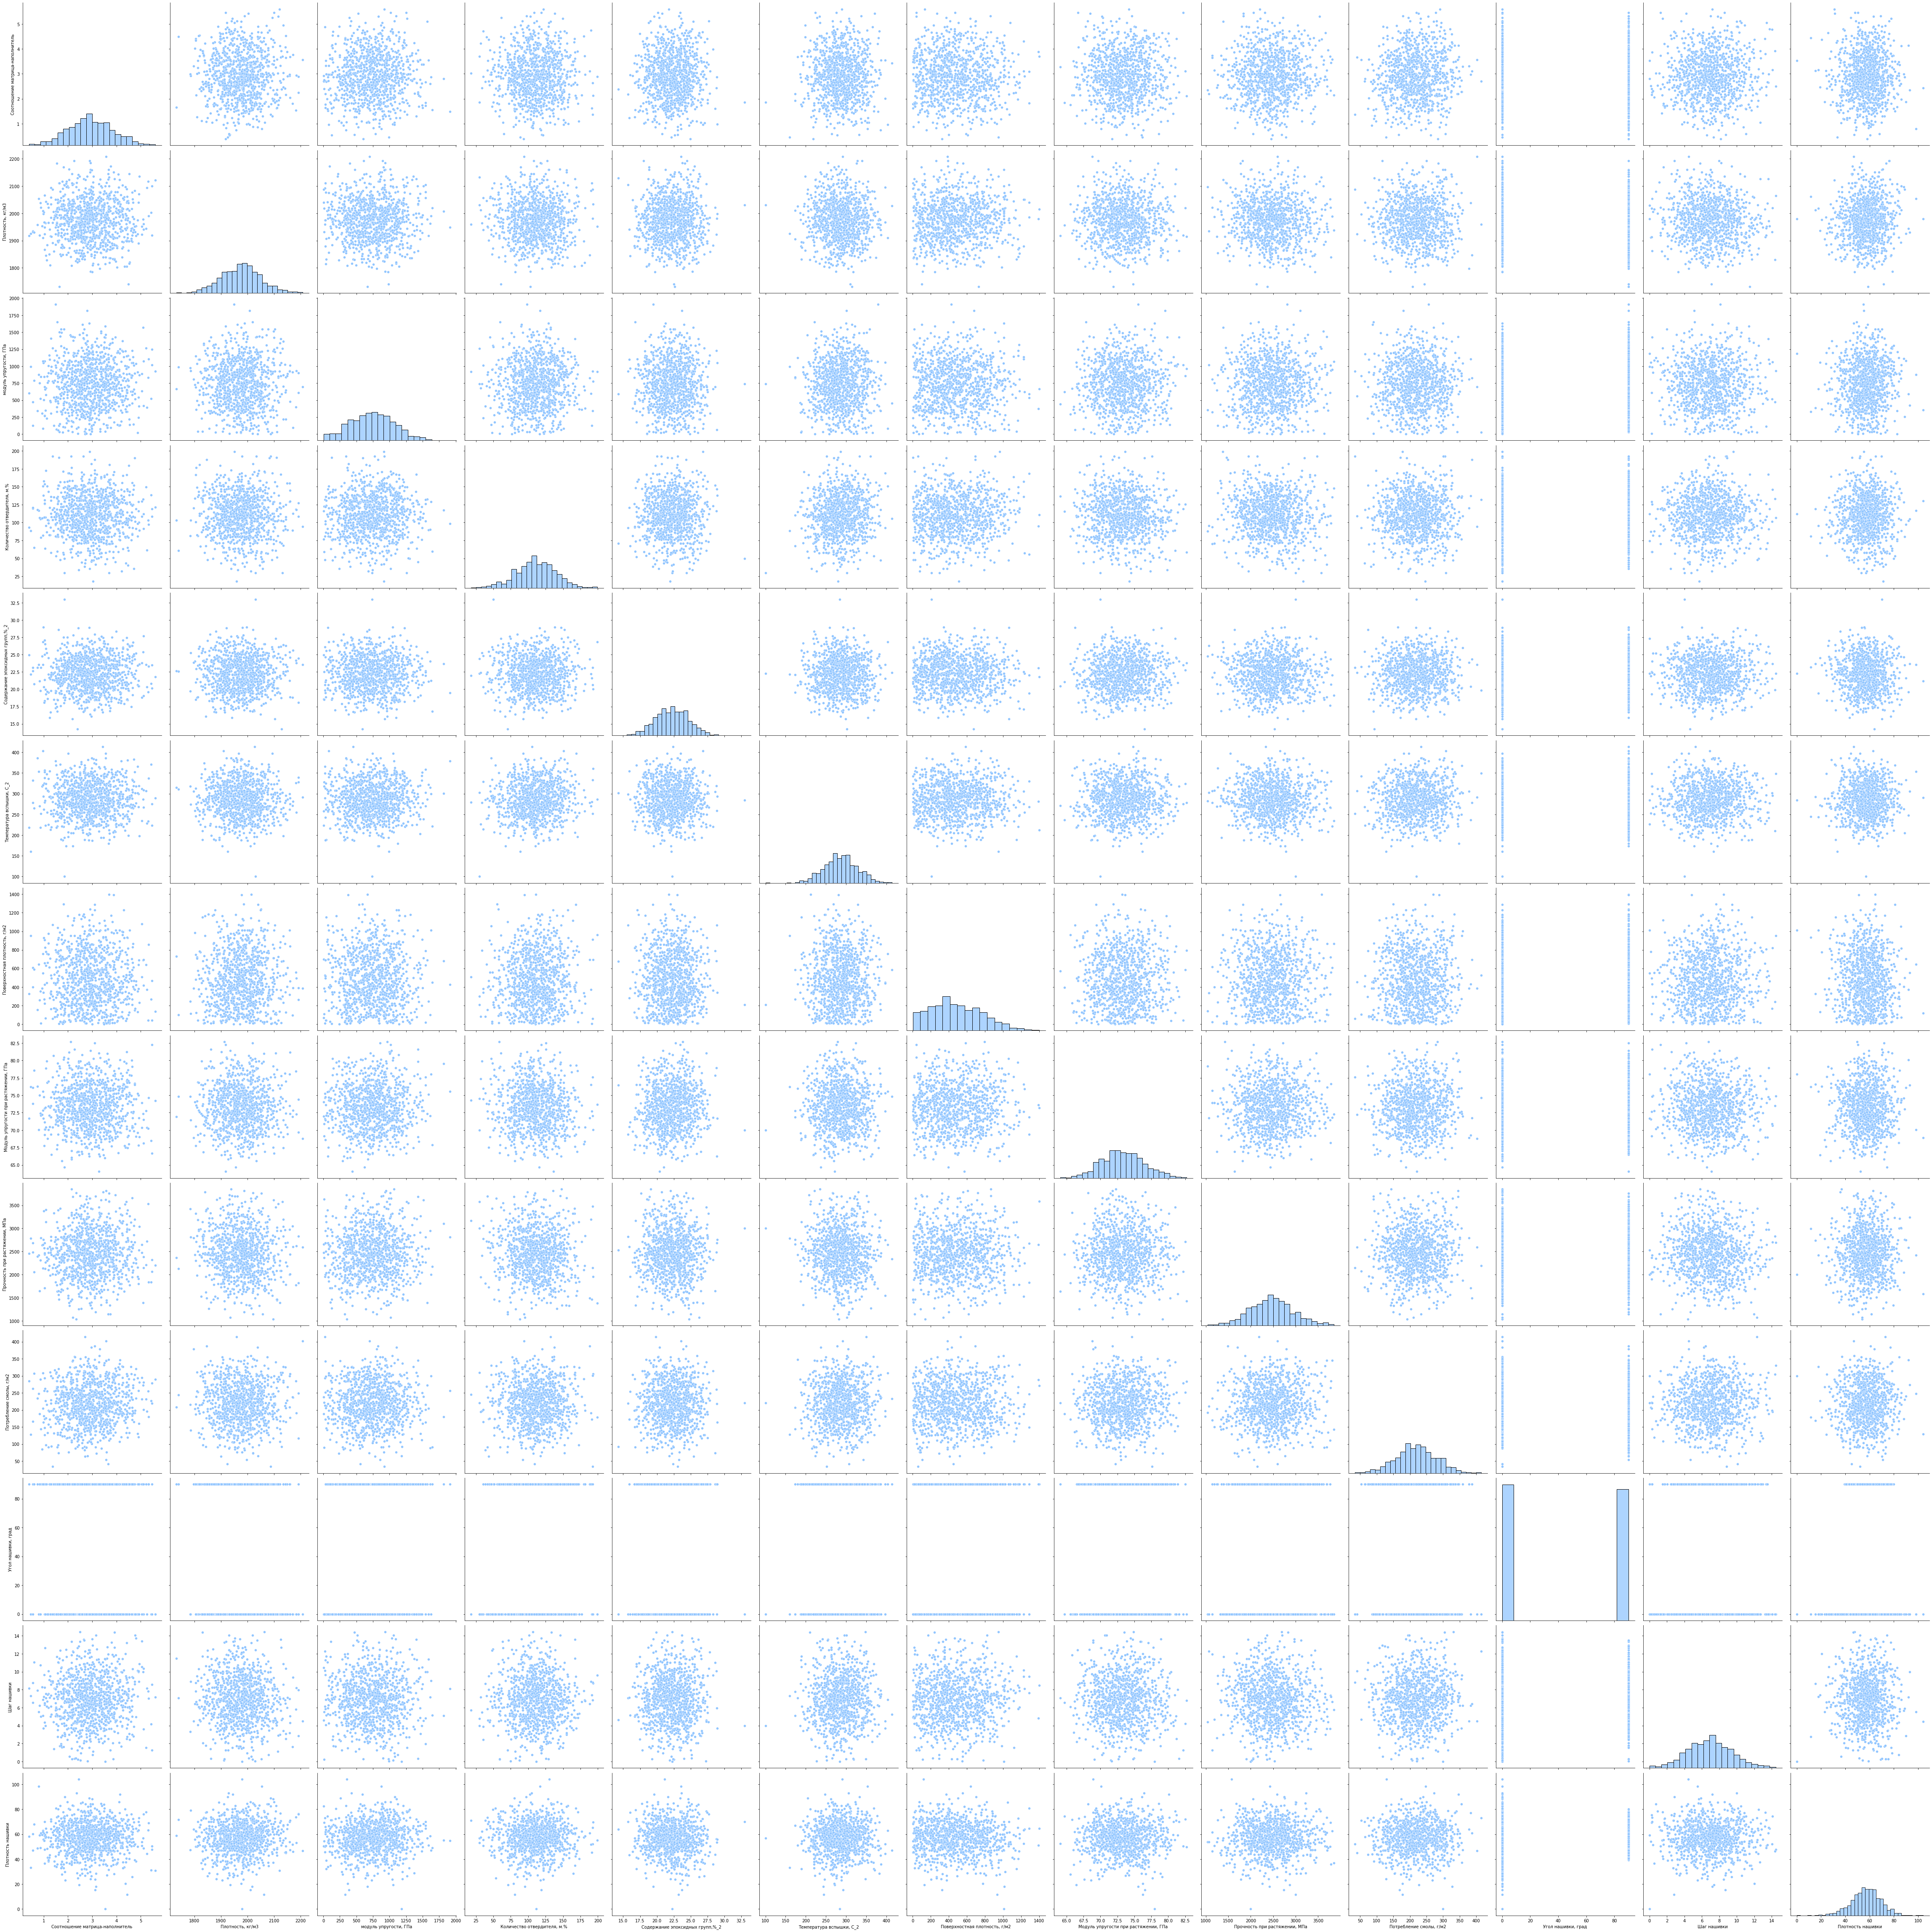

In [21]:
# Строим диаграммы рассеяния
sns.pairplot(df, height=5)

По полученным данным, можно констатировать то, что имеются выбросы.

Соотношение матрица-наполнитель: s=0


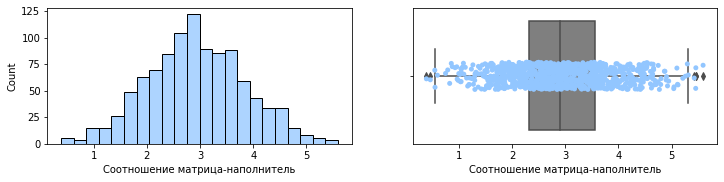

Плотность, кг/м3: s=3


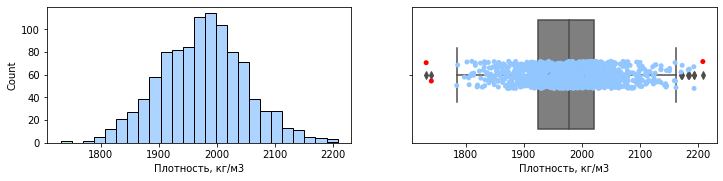

модуль упругости, ГПа: s=2


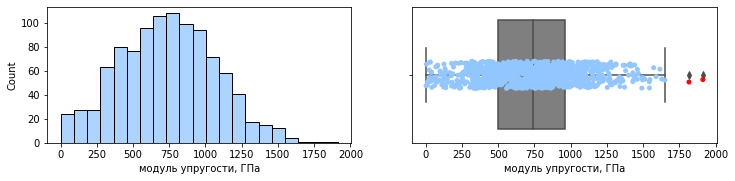

Количество отвердителя, м.%: s=2


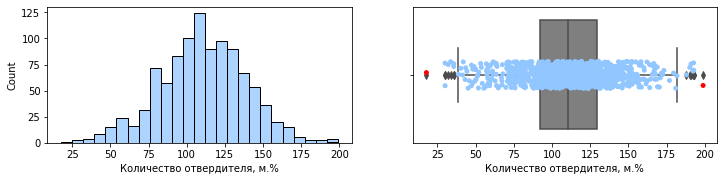

Содержание эпоксидных групп,%_2: s=2


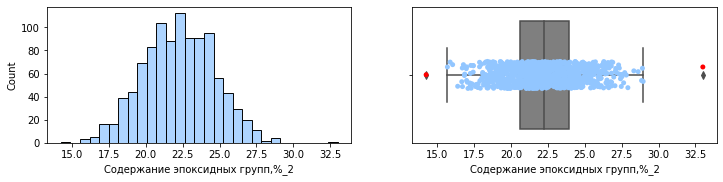

Температура вспышки, С_2: s=3


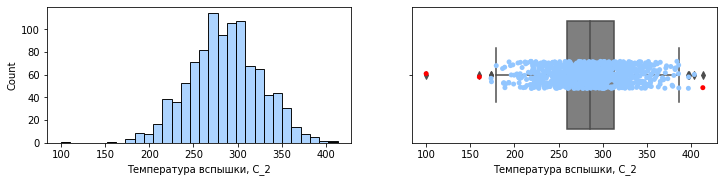

Поверхностная плотность, г/м2: s=2


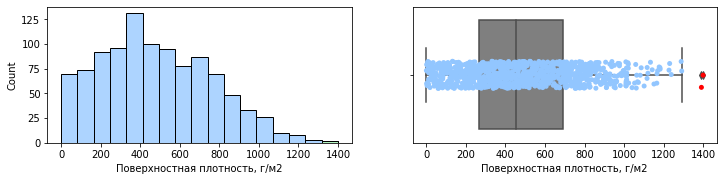

Модуль упругости при растяжении, ГПа: s=0


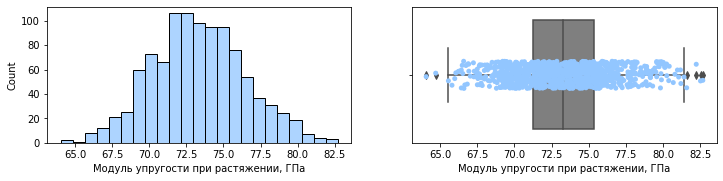

Прочность при растяжении, МПа: s=0


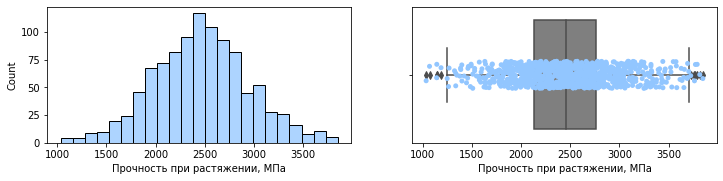

Потребление смолы, г/м2: s=3


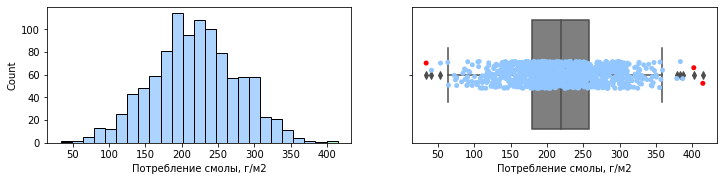

Угол нашивки, град: s=0


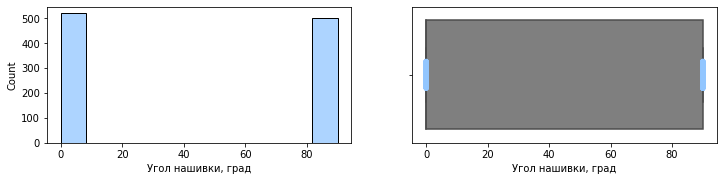

Шаг нашивки: s=0


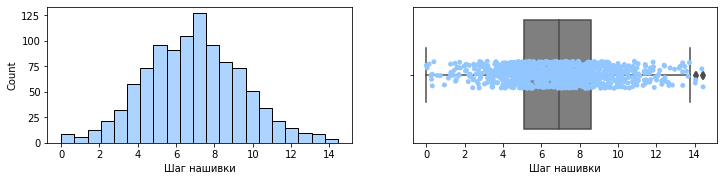

Плотность нашивки: s=7


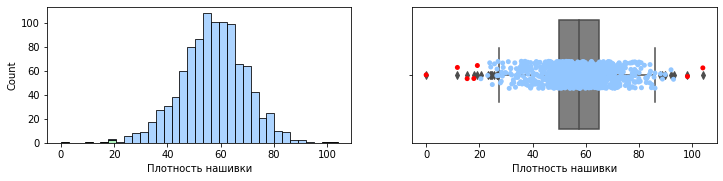

Найдено выбросов: 24


In [22]:
# Ищем выбросы. Воспользуемся критерием трех сигм.
count = 0
for column in df:
    d = df.loc[:, [column]]
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['s'] = zscore.abs() > 3
    count += d['s'].sum()
  
    # Визуализация выбросов
    print('{}: s={}'.format(column, d['s'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['s']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['s']==True], x=column, color='red', ax=axes[1])
    plt.show()

print('Найдено выбросов:', count)


In [23]:
# Удаляем выбросы
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [24]:
# Сохраняем полученный датафрейм
df.to_excel(data_path + 'data_zscored.xlsx')

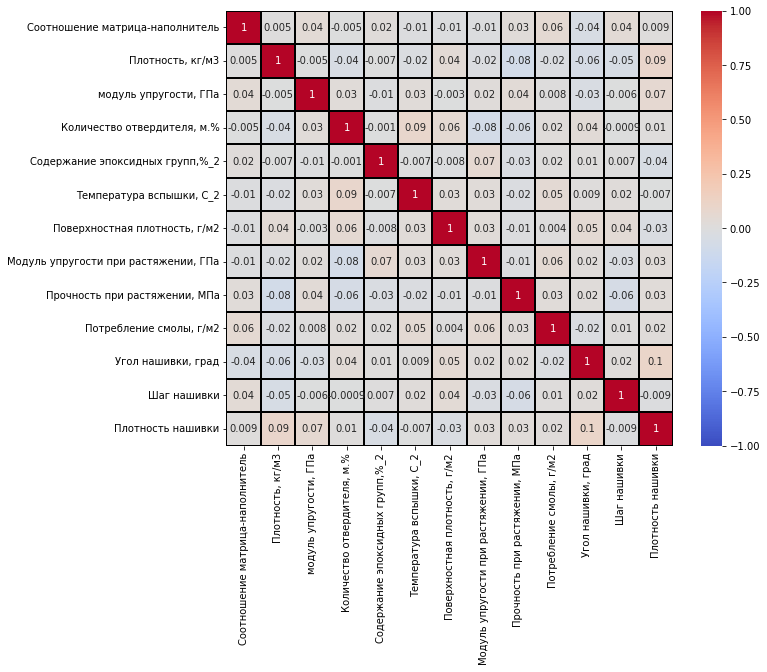

In [25]:
# Для получения информации о зависимостях между признаками рассмотрим матрицу корреляции
cor = df.corr()
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(cor, vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='coolwarm', linewidths=1, linecolor='black', ax=axes)
plt.show()

Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Максимальная корреляция наблюдается между Плотностью нашивки и Углом нашивки и составляет 0.1. 

In [26]:
# Загружаем датафрейм, подготовленный на предыдущем шаге
df = pd.read_excel(data_path + 'data_zscored.xlsx', index_col=0)
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

Далее попробуем найти возможно имеющиеся связи между 
признаками. Определим, что признаки составляют несколько групп: матрица и наполнитель, готовый композит (модуль упругости при растяжении и прочность при растяжении) и "матрица-наполнитель".
Таким образом, для каждого целевого признака построим отдельную модель. 


In [27]:
# Группируем признаки для прогнозирования модуля упругости при растяжении
X_features1 = ['Соотношение матрица-наполнитель', 
               'Плотность, кг/м3',
               'модуль упругости, ГПа', 
               'Количество отвердителя, м.%',
               'Содержание эпоксидных групп,%_2', 
               'Температура вспышки, С_2',
               'Поверхностная плотность, г/м2', 
               'Потребление смолы, г/м2',
               'Угол нашивки, град', 
               'Шаг нашивки', 
               'Плотность нашивки'
]
y_features1 = ['Модуль упругости при растяжении, ГПа']
X1 = df.loc[:, X_features1]
y1 = df.loc[:, y_features1]

In [28]:
# Группируем признаки для прогнозирования прочности при растяжении
X_features2 = ['Соотношение матрица-наполнитель', 
               'Плотность, кг/м3',
               'модуль упругости, ГПа', 
               'Количество отвердителя, м.%',
               'Содержание эпоксидных групп,%_2', 
               'Температура вспышки, С_2',
               'Поверхностная плотность, г/м2', 
               'Потребление смолы, г/м2',
               'Угол нашивки, град', 
               'Шаг нашивки', 
               'Плотность нашивки'
]
y_features2 = ['Прочность при растяжении, МПа']
X2 = df.loc[:, X_features2]
y2 = df.loc[:, y_features2]

In [29]:
# Группируем признаки для прогнозирования соотношения матрица-наполнитель
X_features3 = ['Плотность, кг/м3',
               'модуль упругости, ГПа', 
               'Количество отвердителя, м.%',
               'Содержание эпоксидных групп,%_2', 
               'Температура вспышки, С_2',
               'Поверхностная плотность, г/м2', 
               'Модуль упругости при растяжении, ГПа',
               'Прочность при растяжении, МПа', 
               'Потребление смолы, г/м2',
               'Угол нашивки, град', 
               'Шаг нашивки', 
               'Плотность нашивки'
]
y_features3 = ['Соотношение матрица-наполнитель']
X3 = df.loc[:, X_features3]
y3 = df.loc[:, y_features3]

Многие алгоритмы машинного обучения работают лучше или сходятся быстрее, когда функции находятся в относительно одинаковом масштабе и / или близки к нормальному распределению. Поэтому нам будет необходимо выполнить нормализацию входных данных. При этом для категориального признака 'Угол нашивки, град', принимающего всего 2 значения ('0' и '90'), используем OrdinalEncoder, а для остальных признаков применим MinMaxScaler.

In [30]:
# Поделим переменные на категориальные и численные
X_categ = ['Угол нашивки, град']
X_numer1 = [column for column in X_features1 if column not in X_categ]
X_numer2 = [column for column in X_features2 if column not in X_categ]
X_numer3 = [column for column in X_features3 if column not in X_categ]

Далее переходим к выбору моделей для предсказания выходных данных. Для сравнения моделей используем несколько метрик.



In [31]:
# Определим функцию для запуска моделей
def models_on(models, X, y):
    metric = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=42)
    scoring = ['r2', 
               'neg_root_mean_squared_error', 
               'neg_mean_absolute_error',
               'max_error', 
              ]
    for model_name, model in models.items():
        scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
        metric.loc[model_name, 'R2'] = scores['test_r2'].mean()
        metric.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        metric.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        metric.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return metric

In [32]:
# Определим функцию для поиска гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой
def grid_search_on(model, params, X, y):
    pd.options.display.max_colwidth = 100
    metric = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=42)
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(X, y)
    metric.loc[:, 'params'] = searcher.cv_results_['params']
    metric.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    metric.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return metric, searcher.best_estimator_

In [33]:
# Определим функцию для получения метрик
def metrics_on(model_name, y, y_pred):
    metric = pd.DataFrame()
    metric.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    metric.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * (-1)
    metric.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * (-1)
    metric.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * (-1)
    return metric

Для определения нижней границы качества рабочей модели будем использовать DummyRegressor из библиотеки sklearn (стратегия использования - с предсказанием среднего значения обучающей выборки). Данный регрессор полезен в качестве простого базиса для сравнения с другими (реальными) регрессорами. 


1) Модель для прогнозирования модуля упругости при растяжении

In [34]:
# Делим выборку на тренировочную и тестовую 
X1_train_main, X1_test_main, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
print('X1_train:', X1_train_main.shape, 'y1_train:', y1_train.shape)
print('X1_test:', X1_test_main.shape, 'y1_test:', y1_test.shape)

X1_train: (700, 11) y1_train: (700, 1)
X1_test: (300, 11) y1_test: (300, 1)


In [35]:
# Выведем описательную статистику входных данных до нормализации
X1_train_main.describe().loc[['count', 'min', 'max', 'mean', 'std'], :].style.format(precision=5)

In [36]:
# Нормализуем данные
pre1 = ColumnTransformer(transformers=[
        ("numerical", MinMaxScaler(), X_numer1),
        ("categorical", OrdinalEncoder(), X_categ)
        ])
X1_train = pre1.fit_transform(X1_train_main)
X1_test = pre1.transform(X1_test_main)

In [37]:
# Выходные данные оставляем без изменения
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [38]:
# Выведем описательную статистику входных данных после нормализации
pd.DataFrame(X1_train, columns=(X_numer1 + X_categ)).describe().loc[['count', 'min', 'max', 'mean', 'std'], :].style.format(precision=5)

In [39]:
# Выведем описательную статистику выходных данных
pd.DataFrame(y1_train).describe().loc[['count', 'min', 'max', 'mean', 'std'], :].style.format(precision=5)

In [40]:
# Сравним результативность моделей с гиперпараметрами по умолчанию
default_models1 = {'DummyRegressor': DummyRegressor(strategy='mean'),
                   'LinearRegression': LinearRegression(),
                   'Lasso': Lasso(),
                   'SVR': SVR(),
                   'KNeighborsRegressor': KNeighborsRegressor(),
                   'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
                   'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42), 
                   'RandomForestRegressor': RandomForestRegressor(random_state=42)
}
metric1 = models_on(default_models1, X1_train, y1_train)
metric1.style.highlight_max(axis=0)

Коэффициент детерминации R2 близок к 0 для линейных моделей (LinearRegression и Lasso), а также метода опорных векторов (SVR). Практически все используемые метрики используемых моделей находятся на одном уровне с метриками базовой модели DummyRegressor. 
Алгоритмы Метод К-ближайших соседей и Дерево решений показали еще более низкие результаты. 
Алгоритм Случайный лес и Градиентный бустинг отработали лучше, чем 2 других вышеупомянутых метода, но хуже, чем линейные модели.

In [41]:
# Проведем поиск гиперпараметров используемых моделей для поиска лучшей
best_models1 = {}

In [42]:
# Для Lasso
params1 = [
  {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10]}
]
search, bestmodel = grid_search_on(Lasso(), params1, X1_train, y1_train)
best_models1[str(bestmodel)] = bestmodel
search[search['rank']==1]

params     MAE  rank
3  {'alpha': 0.01} -2.5017     1

In [43]:
# Для SVR
params1 = [
    {'kernel': ['linear'],
     'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.1]
    },
    {'kernel': ['poly'],
     'C': [0.001, 0.01, 0.02, 0.05, 0.1],
     'degree' : [1, 5]
    },
    {'kernel': ['rbf'],
     'C': [0.001, 0.02, 0.03, 0.04, 0.5]
    },
    {'kernel': ['sigmoid'],
     'C': [0.001, 0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, bestmodel = grid_search_on(SVR(), params1, X1_train, y1_train)
best_models1[str(bestmodel)] = bestmodel
search[search['rank']==1]

params       MAE  rank
21  {'C': 0.5, 'kernel': 'rbf'} -2.501344     1

In [44]:
# Для KNeighborsRegressor
params1 = {'n_neighbors': range(3, 100, 2)}
search, bestmodel = grid_search_on(KNeighborsRegressor(), params1, X1_train, y1_train)
best_models1[str(bestmodel)] = bestmodel
search[search['rank']==1]

params       MAE  rank
44  {'n_neighbors': 91} -2.497003     1

In [45]:
# Для DecisionTreeRegressor
params1 = {'random_state': [42],
           'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
           'splitter': ['best', 'random'],
           'max_depth': [1, 2, 3],
           'min_samples_split': [1, 3],
           'max_features': [None, 1, 5, 10, 'sqrt', 'log2']
}
search, bestmodel = grid_search_on(DecisionTreeRegressor(), params1, X1_train, y1_train)
best_models1[str(bestmodel)] = bestmodel
search[search['rank']==1]

params  \
34   {'criterion': 'squared_error', 'max_depth': 2, 'max_features': 5, 'min_samples_split': 3, 'rando...   
106  {'criterion': 'friedman_mse', 'max_depth': 2, 'max_features': 5, 'min_samples_split': 3, 'random...   

          MAE  rank  
34  -2.496037     1  
106 -2.496037     1

In [46]:
# Для GBR
params1 = {'random_state': [42],
           'loss': ['squared_error', 'absolute_error'], 
           'n_estimators': [10, 50, 75, 100],
           'max_depth': [1, 2, 3],
           'min_samples_split': [2, 5, 10],
           'learning_rate': [0.01, 0.1, 0.9] 
}
search, bestmodel = grid_search_on(GradientBoostingRegressor(), params1, X1_train, y1_train)
best_models1[str(bestmodel)] = bestmodel
search[search['rank']==1]

params  \
71  {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 3, 'min_samples_split': 10, 'n_es...   

         MAE  rank  
71 -2.496307     1

In [47]:
# Для RandomForestRegressor
params1 = {'random_state': [42],
           'n_estimators': [10, 50, 100], 
           'criterion': ['absolute_error', 'poisson'],
           'max_depth': [None, 1, 2, 4, 5],
           'max_features': [None, 1, 3, 5, 'sqrt', 'log2'],
           'bootstrap': [False]
}
search, bestmodel = grid_search_on(RandomForestRegressor(), params1, X1_train, y1_train)
best_models1[str(bestmodel)] = bestmodel
search[search['rank']==1]

params  \
4  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 1, 'n_est...   

        MAE  rank  
4 -2.484176     1

In [48]:
# Сравним модели с подобранными гиперпараметрами
metric1_best = models_on(best_models1, X1_train, y1_train)
metric1_best.style.highlight_max(axis=0)

Таким образом, проведенный подбор гиперпараметров несколько улучшил прогнозирование используемых моделей. Однако, все выбранные модели все также не могут найти зависимости.





In [49]:
# Спрогнозируем с помощью базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(X1_train, y1_train)
y1_pred_base = base_model1.predict(X1_test)

In [50]:
# Спрогнозируем с помощью лучшей модели
best_model1 = KNeighborsRegressor(n_neighbors=91) 
best_model1.fit(X1_train, y1_train)
y1_pred_best = best_model1.predict(X1_test)

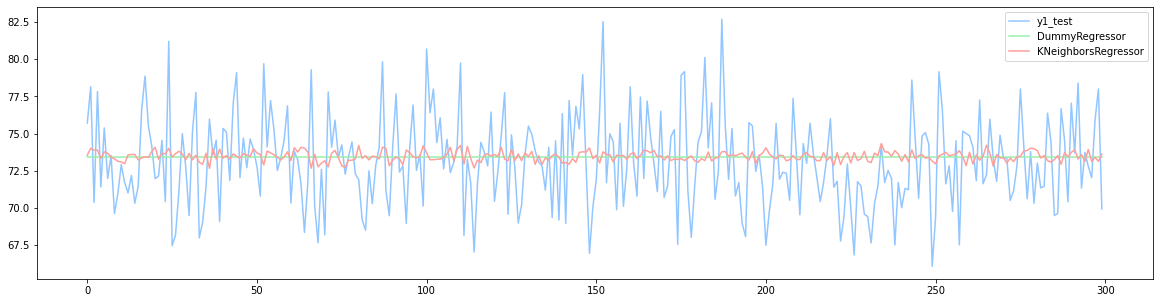

In [51]:
# Визуализизируем прогнозы
fig, axes = plt.subplots(figsize=(20, 5))
axes.plot(y1_test, label='y1_test')
axes.plot(y1_pred_base, label='DummyRegressor')
axes.plot(y1_pred_best, label='KNeighborsRegressor')
axes.legend()
plt.show()

In [52]:
# Сравнение прогнозов базовой и лучшей моделей на тестовом наборе
compare1 = metrics_on('DummyRegressor', y1_test, y1_pred_base)
compare1 = compare1.append(metrics_on('KNeighborsRegressor', y1_test, y1_pred_best))
compare1

R2      RMSE       MAE  max_error
DummyRegressor      -0.007651 -3.082670 -2.479138  -9.283290
KNeighborsRegressor -0.012047 -3.089388 -2.490524  -8.909661

2) Модель для прогнозирования прочности при растяжении

In [53]:
# Делим выборку на тренировочную и тестовую
X2_train_main, X2_test_main, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
print('X2_train:', X2_train_main.shape, 'y2_train:', y2_train.shape)
print('X2_test:', X2_test_main.shape, 'y2_test:', y2_test.shape)

X2_train: (700, 11) y2_train: (700, 1)
X2_test: (300, 11) y2_test: (300, 1)


In [54]:
# Выведем описательную статистику входных данных до нормализации
X2_train_main.describe().loc[['count', 'min', 'max', 'mean', 'std'], :].style.format(precision=5)

In [55]:
# Нормализуем данные
pre2 = ColumnTransformer(transformers=[
        ("numerical", MinMaxScaler(), X_numer2),
        ("categorical", OrdinalEncoder(), X_categ)
        ])
X2_train = pre2.fit_transform(X2_train_main)
X2_test = pre2.transform(X2_test_main)

In [56]:
# Выходные данные оставляем без изменения
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [57]:
# Выведем описательную статистику входных данных после нормализации
pd.DataFrame(X2_train, columns=(X_numer2 + X_categ)).describe().loc[['count', 'min', 'max', 'mean', 'std'], :].style.format(precision=5)

In [58]:
# Выведем описательную статистику выходных данных
pd.DataFrame(y2_train).describe().loc[['count', 'min', 'max', 'mean', 'std'], :].style.format(precision=5)

In [59]:
# Сравним результативность моделей с гиперпараметрами по умолчанию
default_models2 = {'DummyRegressor': DummyRegressor(strategy='mean'),
                   'LinearRegression': LinearRegression(),
                   'Lasso': Lasso(),
                   'SVR': SVR(),
                   'KNeighborsRegressor': KNeighborsRegressor(),
                   'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
                   'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42), 
                   'RandomForestRegressor': RandomForestRegressor(random_state=42)
}
metric2 = models_on(default_models2, X2_train, y2_train)
metric2.style.highlight_max(axis=0)

Практически все используемые метрики данных моделей находятся на одном уровне с метриками базовой модели DummyRegressor. Метод Дерево решений показал самый низкий результат.

In [60]:
# Проведем поиск гиперпараметров используемых моделей для поиска лучшей
best_models2 = {}

In [61]:
# Для Lasso
params2 = [
  {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10]}
]
search, bestmodel = grid_search_on(Lasso(), params2, X2_train, y2_train)
best_models2[str(bestmodel)] = bestmodel
search[search['rank']==1]

params         MAE  rank
8  {'alpha': 1} -390.216167     1

In [62]:
# Для SVR
params2 = [
    {'kernel': ['linear'],
     'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.1]
    },
    {'kernel': ['poly'],
     'C': [0.001, 0.01, 0.02, 0.05, 0.1],
     'degree' : [1, 5]
    },
    {'kernel': ['rbf'],
     'C': [0.001, 0.02, 0.03, 0.04, 0.5]
    },
    {'kernel': ['sigmoid'],
     'C': [0.001, 0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, bestmodel = grid_search_on(SVR(), params2, X2_train, y2_train)
best_models2[str(bestmodel)] = bestmodel
search[search['rank']==1]

params         MAE  rank
10  {'C': 0.01, 'degree': 5, 'kernel': 'poly'} -386.090173     1

In [63]:
# Для KNeighborsRegressor
params2 = [
    {'n_neighbors': range(3, 100, 2)}
]
search, bestmodel = grid_search_on(KNeighborsRegressor(), params2, X2_train, y2_train)
best_models2[str(bestmodel)] = bestmodel
search[search['rank']==1]

params         MAE  rank
32  {'n_neighbors': 67} -389.708036     1

In [64]:
# Для DecisionTreeRegressor
params2 = {'random_state': [42],
           'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
           'splitter': ['best', 'random'],
           'max_depth': [1, 2, 3],
           'min_samples_split': [1, 3],
           'max_features': [None, 1, 5, 10, 'sqrt', 'log2']
}
search, bestmodel = grid_search_on(DecisionTreeRegressor(), params2, X2_train, y2_train)
best_models2[str(bestmodel)] = bestmodel
search[search['rank']==1]

params  \
279  {'criterion': 'poisson', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 3, 'random_sta...   

            MAE  rank  
279 -388.357164     1

In [65]:
# Для GBR
params2 = {'random_state': [42],
           'loss': ['squared_error', 'absolute_error'], 
           'n_estimators': [10, 50, 75, 100],
           'max_depth': [1, 2, 3],
           'min_samples_split': [2, 5, 10],
           'learning_rate': [0.01, 0.1, 0.9] 
}
search, bestmodel = grid_search_on(GradientBoostingRegressor(), params2, X2_train, y2_train)
best_models2[str(bestmodel)] = bestmodel
search[search['rank']==1]

params  \
134  {'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 3, 'min_samples_split': 2, 'n_esti...   

            MAE  rank  
134 -386.488031     1

In [66]:
# Для RandomForestRegressor
params2 = {'random_state': [42],
           'n_estimators': [10, 50, 100], 
           'criterion': ['absolute_error', 'poisson'],
           'max_depth': [None, 1, 2, 4, 5],
           'max_features': [None, 1, 3, 5, 'sqrt', 'log2'],
           'bootstrap': [False]
}
search, bestmodel = grid_search_on(RandomForestRegressor(), params2, X2_train, y2_train)
best_models2[str(bestmodel)] = bestmodel
search[search['rank']==1]

params  \
148  {'bootstrap': False, 'criterion': 'poisson', 'max_depth': 4, 'max_features': 1, 'n_estimators': ...   

            MAE  rank  
148 -388.959919     1

In [67]:
# Сравним модели с подобранными гиперпараметрами
metric2_best = models_on(best_models2, X2_train, y2_train)
metric2_best.style.highlight_max(axis=0)

Проведенный подбор гиперпараметров несколько улучшил предсказание используемых моделей. Однако, все выбранные модели все также не могут найти искомые зависимости. GradientBoostingRegressor при этом справился лучше остальных моделей и демонстрирует лучшую объясняющую способность среди используемых методов.

In [68]:
# Спрогнощируем с помощью базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(X2_train, y2_train)
y2_pred_base = base_model2.predict(X2_test)

In [69]:
# Спрогнозируем с помощью лучшей модели
best_model2 = GradientBoostingRegressor(loss='absolute_error', n_estimators=75, random_state=42)
best_model2.fit(X2_train, y2_train)
y2_pred_best = best_model2.predict(X2_test)

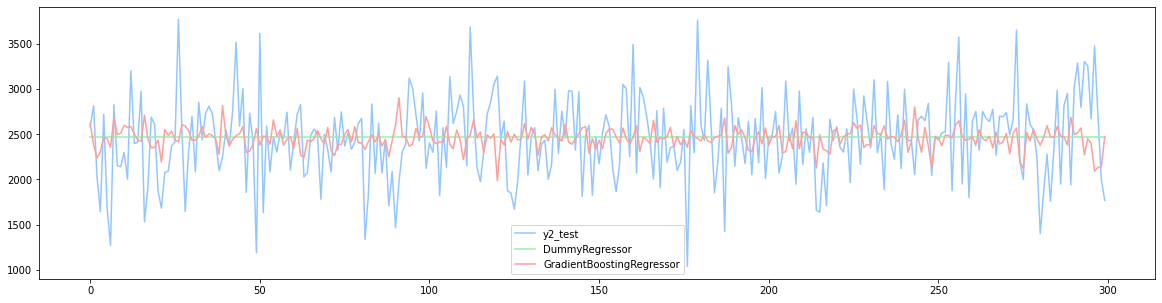

In [70]:
# Визуализизируем прогнозы
fig, axes = plt.subplots(figsize=(20, 5))
axes.plot(y2_test, label='y2_test')
axes.plot(y2_pred_base, label='DummyRegressor')
axes.plot(y2_pred_best, label='GradientBoostingRegressor')
axes.legend()
plt.show()

In [71]:
# Сравним прогнозы базовой и лучшей моделей на тестовом наборе
compare2 = metrics_on('DummyRegressor', y2_test, y2_pred_base)
compare2 = compare2.append(metrics_on('GradientBoostingRegressor', y2_test, y2_pred_best))
compare2

R2        RMSE         MAE    max_error
DummyRegressor            -0.000928 -464.631542 -363.886617 -1432.252593
GradientBoostingRegressor -0.083697 -483.460637 -377.439793 -1385.473615

3) Модель для прогнозирования соотношения матрица-наполнитель

In [72]:
# Делим выборку на тренировочную и тестовую
X3_train_main, X3_test_main, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
print('X3_train:', X3_train_main.shape, 'y3_train:', y3_train.shape)
print('X3_test:', X3_test_main.shape, 'y3_test:', y3_test.shape)

X3_train: (700, 12) y3_train: (700, 1)
X3_test: (300, 12) y3_test: (300, 1)


In [73]:
# Выведем описательную статистику входных данных до нормализации
X3_train_main.describe().loc[['count', 'min', 'max', 'mean', 'std'], :].style.format(precision=5)

In [74]:
# Нормализуем данные
pre3 = ColumnTransformer(transformers=[
        ("numerical", MinMaxScaler(), X_numer3),
        ("categorical", OrdinalEncoder(), X_categ)
        ])
X3_train = pre3.fit_transform(X3_train_main)
X3_test = pre3.transform(X3_test_main)

In [75]:
# Выходные данные оставляем без изменения
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [76]:
# Выведем описательную статистику входных данных после нормализации
pd.DataFrame(X3_train, columns=(X_numer3 + X_categ)).describe().loc[['count', 'min', 'max', 'mean', 'std'], :].style.format(precision=5)

In [77]:
# Выведем описательную статистику выходных данных
pd.DataFrame(y3_train).describe().loc[['count', 'min', 'max', 'mean', 'std'], :].style.format(precision=5)

In [78]:
# Спрогнощируем с помощью базовой модели
base_model3 = DummyRegressor(strategy='mean')
base_model3.fit(X3_train, y3_train)
y3_pred_base = base_model3.predict(X3_test)

In [79]:
# Настраиваем нейросеть
model3_NN = MLPRegressor(hidden_layer_sizes = (24, 48, 48, 48, 24, 24),
                         activation = 'relu',
                         solver='adam',
                         max_iter=400,
                         early_stopping = True,
                         validation_fraction = 0.3,
                         random_state=42, 
                         verbose=True
)

In [80]:
%%time
model3_NN.fit(X3_train, y3_train)

Iteration 1, loss = 5.23464916
Validation score: -10.003892
Iteration 2, loss = 4.84969287
Validation score: -9.075866
Iteration 3, loss = 4.42066351
Validation score: -8.050065
Iteration 4, loss = 3.94922234
Validation score: -6.938349
Iteration 5, loss = 3.43831456
Validation score: -5.744029
Iteration 6, loss = 2.89129857
Validation score: -4.440638
Iteration 7, loss = 2.27953742
Validation score: -3.071933
Iteration 8, loss = 1.67173830
Validation score: -1.849335
Iteration 9, loss = 1.13117268
Validation score: -0.833579
Iteration 10, loss = 0.69019369
Validation score: -0.244047
Iteration 11, loss = 0.46507648
Validation score: -0.293736
Iteration 12, loss = 0.53540602
Validation score: -0.670863
Iteration 13, loss = 0.65684197
Validation score: -0.642783
Iteration 14, loss = 0.60321696
Validation score: -0.355666
Iteration 15, loss = 0.49865497
Validation score: -0.163885
Iteration 16, loss = 0.44383979
Validation score: -0.134576
Iteration 17, loss = 0.45123958
Validation score

MLPRegressor(early_stopping=True, hidden_layer_sizes=(24, 48, 48, 48, 24, 24),
             max_iter=400, random_state=42, validation_fraction=0.3,
             verbose=True)

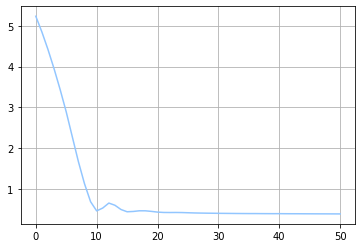

In [81]:
plt.plot(model3_NN.loss_curve_)
plt.grid(True)
plt.show()

In [82]:
# Спрогнозируем с помощью MLPRegressor
y3_pred_NN = model3_NN.predict(X3_test)

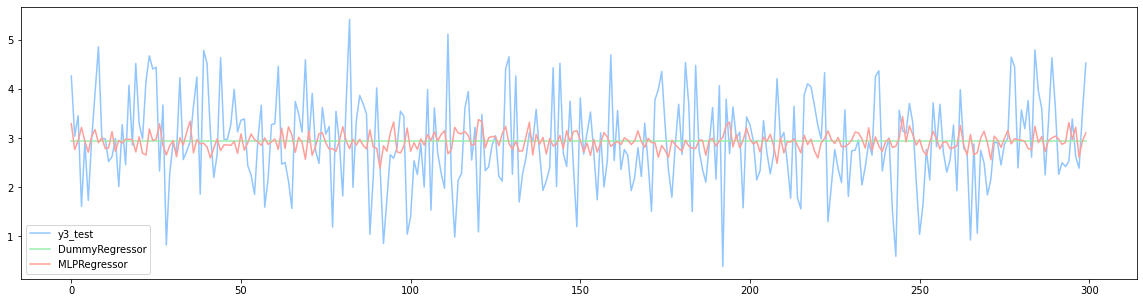

In [83]:
# Визуализируем прогнозы
fig, axes = plt.subplots(figsize=(20, 5))
axes.plot(y3_test, label='y3_test')
axes.plot(y3_pred_base, label='DummyRegressor')
axes.plot(y3_pred_NN, label='MLPRegressor')
axes.legend()
plt.show()


In [84]:
# Сравним прогнозы базовой и модели MLPRegressor на тестовом наборе
compare3 = metrics_on('DummyRegressor', y3_test, y3_pred_base)
compare3 = compare3.append(metrics_on('MLPRegressor', y3_test, y3_pred_NN))
compare3

R2      RMSE       MAE  max_error
DummyRegressor -0.000744 -0.924041 -0.739327  -2.554458
MLPRegressor   -0.043173 -0.943426 -0.753366  -2.633232

Построим нейросеть с помощью библиотеки TensorFlow


In [85]:
# Собираем нейронную сеть
model3_NN2 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=36, activation='relu', name='dense_4'),
      keras.layers.Dense(units=36, activation='relu', name='dense_5'),
      keras.layers.Dense(units=36, activation='relu', name='dense_6'),
      keras.layers.Dense(units=36, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=48, activation='relu', name='dense_9'),
      keras.layers.Dense(units=24, activation='relu', name='dense_10'),
      keras.layers.Dense(units=1, name='out')                        
    ])                    

# Компилируем нейронную сеть
model3_NN2.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsoluteError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

# Выводим сводную информацию по архитектуре сети
model3_NN2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 36)                900       
                                                                 
 dense_5 (Dense)             (None, 36)                1332      
                                                                 
 dense_6 (Dense)             (None, 36)                1332      
                                                                 
 dense_7 (Dense)             (None, 36)                1

In [86]:
# Обучим нейросеть
%%time
history = model3_NN2.fit(
  X3_train, 
  y3_train, 
  epochs=100, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/100
16/16 [==============================] - 1s 20ms/step - loss: 2.6603 - root_mean_squared_error: 2.8086 - val_loss: 2.2071 - val_root_mean_squared_error: 2.4019
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 1.2348 - root_mean_squared_error: 1.4974 - val_loss: 0.8975 - val_root_mean_squared_error: 1.1461
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7940 - root_mean_squared_error: 0.9821 - val_loss: 0.7817 - val_root_mean_squared_error: 0.9952
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7645 - root_mean_squared_error: 0.9370 - val_loss: 0.7809 - val_root_mean_squared_error: 0.9930
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7555 - root_mean_squared_error: 0.9266 - val_loss: 0.7845 - val_root_mean_squared_error: 0.9940
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7357 - root_mean_squared_error: 0.9035 - val_loss: 0.7823 - val_root_

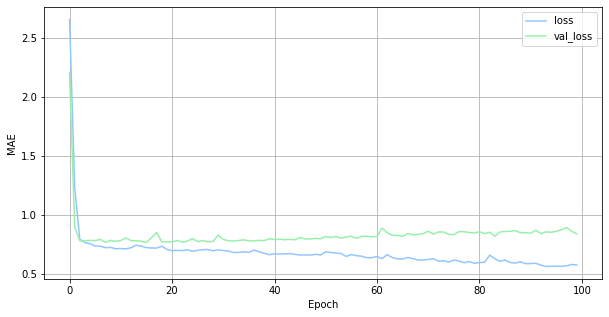

In [87]:
# Строим график ошибки MAE
fig, axes = plt.subplots(figsize=(10, 5))
axes.plot(history.history['loss'], label='loss')
axes.plot(history.history['val_loss'], label='val_loss')
axes.set_xlabel('Epoch')
axes.set_ylabel('MAE')
axes.legend()
axes.grid(True)
plt.show()

In [88]:
# Проверим точность нейросети на тестовой выборке
model3_NN2.evaluate(X3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.8373 - root_mean_squared_error: 1.0345


[0.8372818827629089, 1.0344520807266235]

In [89]:
# Предскажем
y3_pred_NN2 = model3_NN2.predict(X3_test)

10/10 [==============================] - 0s 2ms/step


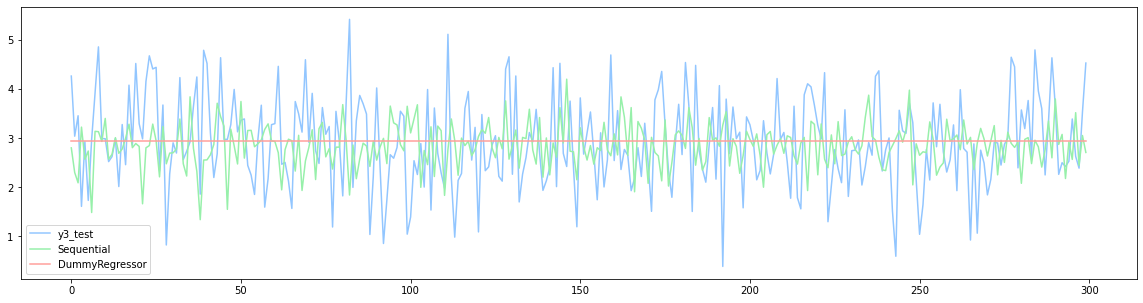

In [90]:
# Визуализируем прогнозы
fig, axes = plt.subplots(figsize=(20, 5))
axes.plot(y3_test, label='y3_test')
axes.plot(y3_pred_NN2, label='Sequential')
axes.plot(y3_pred_base, label='DummyRegressor')
axes.legend()
plt.show()

Для того, чтобы улучшить качество модели, воспользуемся возможностью остановить обучение модели раньше. 

In [91]:
# Соберем модель нейросети с идентичной архитектурой
model3_NN3 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=36, activation='relu', name='dense_4'),
      keras.layers.Dense(units=36, activation='relu', name='dense_5'),
      keras.layers.Dense(units=36, activation='relu', name='dense_6'),
      keras.layers.Dense(units=36, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=48, activation='relu', name='dense_9'),
      keras.layers.Dense(units=24, activation='relu', name='dense_10'),
      keras.layers.Dense(units=1, name='out')                        
    ])                    

# Скомпилируем ее
model3_NN3.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsoluteError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

# Обучим, применив EarlyStopping, который отслеживает значения val_loss
history = model3_NN3.fit(
  X3_train, 
  y3_train, 
  epochs=100, 
  validation_split=0.3, 
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)


Epoch 1/100
16/16 [==============================] - 1s 21ms/step - loss: 2.7080 - root_mean_squared_error: 2.8493 - val_loss: 2.2773 - val_root_mean_squared_error: 2.4680
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 1.2682 - root_mean_squared_error: 1.5333 - val_loss: 0.8090 - val_root_mean_squared_error: 0.9949
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7633 - root_mean_squared_error: 0.9369 - val_loss: 0.8080 - val_root_mean_squared_error: 0.9904
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7289 - root_mean_squared_error: 0.9099 - val_loss: 0.8039 - val_root_mean_squared_error: 0.9843
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7270 - root_mean_squared_error: 0.9023 - val_loss: 0.8037 - val_root_mean_squared_error: 0.9870
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7185 - root_mean_squared_error: 0.8921 - val_loss: 0.8038 - val_root_

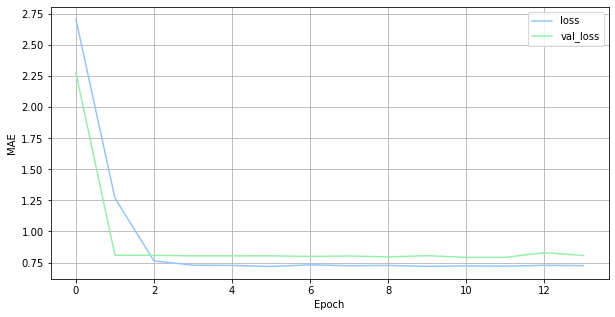

In [92]:
# Строим график ошибки MAE 
fig, axes = plt.subplots(figsize=(10, 5))
axes.plot(history.history['loss'], label='loss')
axes.plot(history.history['val_loss'], label='val_loss')
axes.set_xlabel('Epoch')
axes.set_ylabel('MAE')
axes.legend()
axes.grid(True)
plt.show()

In [93]:
# Проверим точность нейросети на тестовой выборке
model3_NN3.evaluate(X3_test, y3_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.7613 - root_mean_squared_error: 0.9550


[0.7612708210945129, 0.9550415873527527]

In [94]:
# Спрогнозируем
y3_pred_NN3 = model3_NN3.predict(X3_test)

10/10 [==============================] - 0s 3ms/step


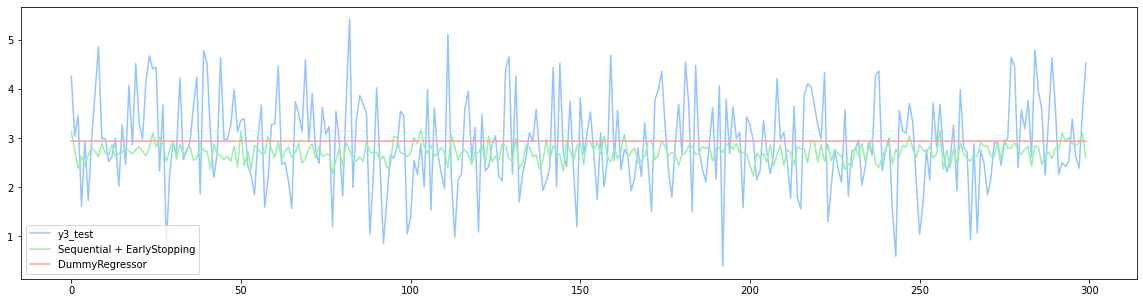

In [95]:
# Визуализируем прогнозы
fig, axes = plt.subplots(figsize=(20, 5))
axes.plot(y3_test, label='y3_test')
axes.plot(y3_pred_NN3, label='Sequential + EarlyStopping')
axes.plot(y3_pred_base, label='DummyRegressor')
axes.legend()
plt.show()

Также для решения проблемы переобучения можем воспользоваться возможностью добавить в модель нейросети Dropout-слои.

In [96]:
# Соберем модель нейросети той же акрхитектуры, добавиs в нее Dropout-слои
model3_NN4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.2, name='do_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.3, name='do_2'),
      keras.layers.Dense(units=36, activation='relu', name='dense_4'),
      keras.layers.Dense(units=36, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.2, name='do_3'),
      keras.layers.Dense(units=36, activation='relu', name='dense_6'),
      keras.layers.Dense(units=36, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.3, name='do_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=48, activation='relu', name='dense_9'),
      keras.layers.Dropout(0.2, name='do_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_10'),
      keras.layers.Dense(units=1, name='out')                        
    ])

# Скомпилируем ее
model3_NN4.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsoluteError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

# Обучим
history = model3_NN4.fit(
  X3_train, 
  y3_train, 
  epochs=100, 
  validation_split=0.3
)

Epoch 1/100
16/16 [==============================] - 2s 30ms/step - loss: 2.7365 - root_mean_squared_error: 2.8781 - val_loss: 2.4635 - val_root_mean_squared_error: 2.6413
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 1.4672 - root_mean_squared_error: 1.7479 - val_loss: 0.8166 - val_root_mean_squared_error: 1.0339
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 1.1265 - root_mean_squared_error: 1.3793 - val_loss: 1.0474 - val_root_mean_squared_error: 1.3115
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 0.9399 - root_mean_squared_error: 1.1565 - val_loss: 0.9455 - val_root_mean_squared_error: 1.1995
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.9315 - root_mean_squared_error: 1.1728 - val_loss: 0.9328 - val_root_mean_squared_error: 1.1846
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8681 - root_mean_squared_error: 1.0773 - val_loss: 0.9045 - val_roo

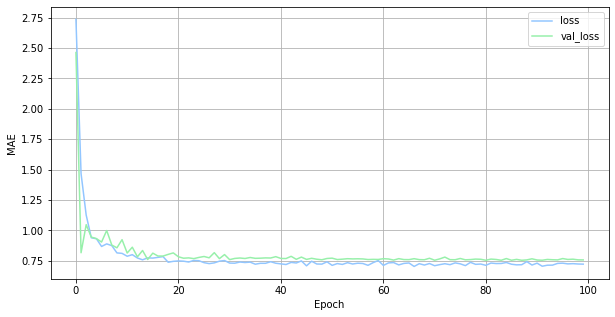

In [97]:
# Строим график ошибки MAE
fig, axes = plt.subplots(figsize=(10, 5))
axes.plot(history.history['loss'], label='loss')
axes.plot(history.history['val_loss'], label='val_loss')
axes.set_xlabel('Epoch')
axes.set_ylabel('MAE')
axes.legend()
axes.grid(True)
plt.show()

In [98]:
# Проверим точность нейросети на тестовой выборке
model3_NN4.evaluate(X3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.7358 - root_mean_squared_error: 0.9234


[0.7357802391052246, 0.9234265089035034]

In [99]:
# Спрогнозируем
y3_pred_NN4 = model3_NN4.predict(X3_test)

10/10 [==============================] - 0s 2ms/step


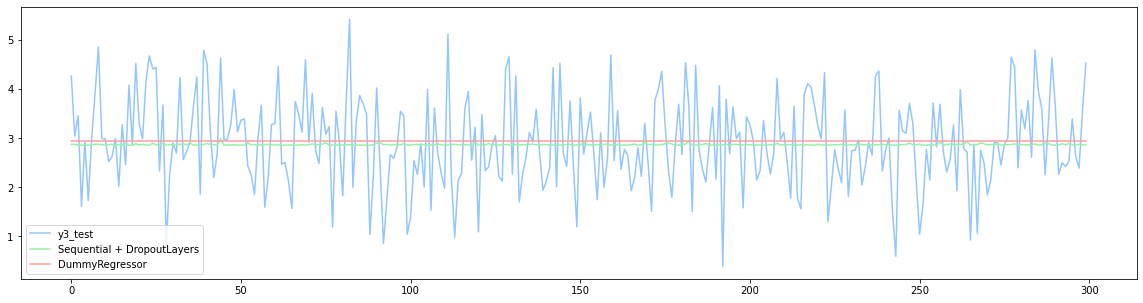

In [100]:
# Визуализируем прогнозы
fig, axes = plt.subplots(figsize=(20, 5))
axes.plot(y3_test, label='y3_test')
axes.plot(y3_pred_NN4, label='Sequential + DropoutLayers')
axes.plot(y3_pred_base, label='DummyRegressor')
axes.legend()
plt.show()

In [101]:
# Сравним прогнозы базовой модели и моделей нейросети на тестовом множестве
compare4 = metrics_on('DummyRegressor', y3_test, y3_pred_base)
compare4 = compare4.append(metrics_on('Sequential', y3_test, y3_pred_NN2))
compare4 = compare4.append(metrics_on('Sequential with EarlyStopping', y3_test, y3_pred_NN3))
compare4 = compare4.append(metrics_on('Sequential with DropoutLayers', y3_test, y3_pred_NN4))
compare4

R2      RMSE       MAE  max_error
DummyRegressor                -0.000744 -0.924041 -0.739327  -2.554458
Sequential                    -0.254183 -1.034452 -0.837282  -3.580135
Sequential with EarlyStopping -0.069018 -0.955042 -0.761271  -2.711501
Sequential with DropoutLayers  0.000587 -0.923427 -0.735780  -2.554991

Показатели метрик все также на низком уровне. Лучшая обобщающая способность на тестовой выборке у нейросети с Dropout-слоями.

Оценим точность моделей на тренировочном и тестовом датасете

In [102]:
# Модель для прогнозирования модуля упругости при растяжении
best_model1

KNeighborsRegressor(n_neighbors=91)

In [103]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(X1_train)
result1 = pd.concat([result1, metrics_on('Модуль упругости / train', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(X1_test)
result1 = pd.concat([result1, metrics_on('Модуль упругости / test', y1_test, y1_pred_test)])
result1

R2      RMSE       MAE  max_error
Модуль упругости / train  0.027593 -3.082905 -2.469592  -9.220760
Модуль упругости / test  -0.012047 -3.089388 -2.490524  -8.909661

In [104]:
# Модель для прогнозирования прочности при растяжении
best_model2

GradientBoostingRegressor(loss='absolute_error', n_estimators=75,
                          random_state=42)

In [105]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(X2_train)
result2 = pd.concat([result2, metrics_on('Прочность при растяжении / train', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(X2_test)
result2 = pd.concat([result2, metrics_on('Прочность при растяжении / test', y2_test, y2_pred_test)])
result2

R2        RMSE         MAE  \
Прочность при растяжении / train  0.249254 -427.318062 -315.244670   
Прочность при растяжении / test  -0.083697 -483.460637 -377.439793   

                                    max_error  
Прочность при растяжении / train -1346.296578  
Прочность при растяжении / test  -1385.473615

In [106]:
# Модель для прогнозирования соотношения матрица-наполнитель
model3_NN4

In [107]:
result3 = pd.DataFrame()
y3_pred_train = model3_NN4.predict(X3_train)
result3 = pd.concat([result3, metrics_on('Соотношение матрица-наполнитель / train', y3_train, y3_pred_train)])
y3_pred_test = model3_NN4.predict(X3_test)
result3 = pd.concat([result3, metrics_on('Соотношение матрица-наполнитель / test', y3_test, y3_pred_test)])
result3

10/10 [==============================] - 0s 2ms/step


R2      RMSE       MAE  \
Соотношение матрица-наполнитель / train -0.002292 -0.902582 -0.720672   
Соотношение матрица-наполнитель / test   0.000587 -0.923427 -0.735780   

                                         max_error  
Соотношение матрица-наполнитель / train  -2.707118  
Соотношение матрица-наполнитель / test   -2.554991

Следующим этапом будет разработка веб-приложения, которое будет выдавать прогноз, полученный моделью нейросети, для соотношения матрица-наполнитель. Поэтому для решения поставленной задачи понадобятся обученные, заранее сохраненные модели. 

In [108]:
# Сохраняем необходимые для приложения модели
filename_p3 = models_path + 'preprocessor3'
file = open(filename_p3, 'wb')
pickle.dump(pre3, file)
file.close()

model3_NN4.save(models_path + '/model3_NN4/')

In [109]:
# Загружаем одну из сохраненных моделей
filename_NN = models_path + 'preprocessor3'
file = open(filename_NN, 'rb')
pre3 = pickle.load(file)
file.close()
pre3

ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                 ['Плотность, кг/м3', 'модуль упругости, ГПа',
                                  'Количество отвердителя, м.%',
                                  'Содержание эпоксидных групп,%_2',
                                  'Температура вспышки, С_2',
                                  'Поверхностная плотность, г/м2',
                                  'Модуль упругости при растяжении, ГПа',
                                  'Прочность при растяжении, МПа',
                                  'Потребление смолы, г/м2', 'Шаг нашивки',
                                  'Плотность нашивки']),
                                ('categorical', OrdinalEncoder(),
                                 ['Угол нашивки, град'])])

In [110]:
# А также загрузим одну из моделей нейросети с помощью библиотеки tensorflow
# Именно эту модель, как "лучшую", и будем использовать в приложении
model3_NN4 = tf.keras.models.load_model(models_path + '/model3_NN4/')
model3_NN4